# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/SI670/Project'

import os
import shutil

import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5

GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
sys.path.append(GOOGLE_DRIVE_PATH)

print(os.listdir(GOOGLE_DRIVE_PATH))

['Data', 'SI670_Project.ipynb']


In [1]:
import random
import numpy as np
import tensorflow as tf
import pandas as pd

SEED = 670

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
pd.set_option('display.max_columns', None)

# Data Loading

In [2]:
# jupyter notebook
import pandas as pd
airlines = pd.read_csv('airlines.csv', index_col=0)
airlines.head()

,carrier,name
1,9E,Endeavor Air Inc.
2,AA,American Airlines Inc.
3,AS,Alaska Airlines Inc.
4,B6,JetBlue Airways
5,DL,Delta Air Lines Inc.


In [5]:
import pandas as pd

data_dir = 'Data'

airlines = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, data_dir, 'airlines.csv'), index_col=0)
airlines.head()

,carrier,name
1,9E,Endeavor Air Inc.
2,AA,American Airlines Inc.
3,AS,Alaska Airlines Inc.
4,B6,JetBlue Airways
5,DL,Delta Air Lines Inc.


In [3]:
# jupyter notebook
airports = pd.read_csv('airports.csv', index_col=0)
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
2,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
3,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
4,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
5,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [6]:
airports = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, data_dir, 'airports.csv'), index_col=0)
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
2,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
3,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
4,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
5,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [4]:
# jupyter notebook
flights = pd.read_csv('flights.csv', index_col=0)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01/01/13 5:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01/01/13 5:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01/01/13 5:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01/01/13 5:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01/01/13 6:00


In [51]:
flights = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, data_dir, 'flights.csv'), index_col=0)
flights.head()

NameError: name 'GOOGLE_DRIVE_PATH' is not defined

In [5]:
# jupyter notebook
planes = pd.read_csv('planes.csv', index_col=0)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
1,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
2,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
5,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [8]:
planes = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, data_dir, 'planes.csv'), index_col=0)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
1,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
2,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
5,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [6]:
# jupyter notebook
weather = pd.read_csv('weather.csv', index_col=0)
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
1,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,01/01/13 1:00
2,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,01/01/13 2:00
3,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,01/01/13 3:00
4,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,01/01/13 4:00
5,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,01/01/13 5:00


In [7]:
weather = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, data_dir, 'weather.csv'), index_col=0)
weather.head()

NameError: name 'GOOGLE_DRIVE_PATH' is not defined

# Data Preprocessing

In [7]:
flights = flights.dropna()
flights = flights[flights['month'] < 2]
flights = flights.drop(columns=['year', 'month', 'day', 'hour', 'minute'], axis=1)

flights.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour
1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,01/01/13 5:00
2,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,01/01/13 5:00
3,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,01/01/13 5:00
4,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,01/01/13 5:00
5,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,01/01/13 6:00


In [8]:
data = flights.merge(weather[['origin', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'time_hour']], on=['origin', 'time_hour'], how='left')
data = data.merge(airports[['faa', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone']], left_on='origin', right_on='faa', how='left')
data = data.merge(planes, on='tailnum', how='left')
data.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,faa,lat,lon,alt,tz,dst,tzone,year,type,manufacturer,model,engines,seats,speed,engine
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,01/01/13 5:00,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,EWR,40.692500,-74.168667,18,-5,A,America/New_York,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,01/01/13 5:00,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,LGA,40.777245,-73.872608,22,-5,A,America/New_York,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,01/01/13 5:00,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,JFK,40.639751,-73.778925,13,-5,A,America/New_York,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,01/01/13 5:00,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,JFK,40.639751,-73.778925,13,-5,A,America/New_York,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,01/01/13 6:00,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,LGA,40.777245,-73.872608,22,-5,A,America/New_York,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan


In [9]:
for column in data.columns:
    if data.dtypes[column] == float:
        data[column].fillna(value=data[column].mean(), inplace=True)
        

data['time_hour'] = data['time_hour'].apply(lambda x: pd.to_datetime(x).timestamp())

data.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,faa,lat,lon,alt,tz,dst,tzone,year,type,manufacturer,model,engines,seats,speed,engine
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,1.357016e+09,39.02,28.04,64.43,260.0,12.65858,27.783439,0.0,1011.9,10.0,EWR,40.692500,-74.168667,18,-5,A,America/New_York,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,116.026786,Turbo-fan
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,1.357016e+09,39.92,24.98,54.81,250.0,14.96014,21.864820,0.0,1011.4,10.0,LGA,40.777245,-73.872608,22,-5,A,America/New_York,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,116.026786,Turbo-fan
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,1.357016e+09,39.02,26.96,61.63,260.0,14.96014,27.783439,0.0,1012.1,10.0,JFK,40.639751,-73.778925,13,-5,A,America/New_York,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,116.026786,Turbo-fan
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,1.357016e+09,39.02,26.96,61.63,260.0,14.96014,27.783439,0.0,1012.1,10.0,JFK,40.639751,-73.778925,13,-5,A,America/New_York,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,116.026786,Turbo-fan
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,1.357020e+09,39.92,24.98,54.81,260.0,16.11092,23.015600,0.0,1011.7,10.0,LGA,40.777245,-73.872608,22,-5,A,America/New_York,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,116.026786,Turbo-fan


In [10]:
from sklearn.preprocessing import LabelEncoder 

labelencoder= LabelEncoder()

data['carrier'] = labelencoder.fit_transform(data['carrier'])
data['tailnum'] = labelencoder.fit_transform(data['tailnum'])
data['origin'] = labelencoder.fit_transform(data['origin'])
data['type'] = labelencoder.fit_transform(data['type'])
data['manufacturer'] = labelencoder.fit_transform(data['manufacturer'])
data['model'] = labelencoder.fit_transform(data['model'])
data['engine'] = labelencoder.fit_transform(data['engine'])

data.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,time_hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,faa,lat,lon,alt,tz,dst,tzone,year,type,manufacturer,model,engines,seats,speed,engine
0,517.0,515,2.0,830.0,819,11.0,11,1545,168,0,IAH,227.0,1400,1.357016e+09,39.02,28.04,64.43,260.0,12.65858,27.783439,0.0,1011.9,10.0,EWR,40.692500,-74.168667,18,-5,A,America/New_York,1999.0,0,8,31,2.0,149.0,116.026786,2
1,533.0,529,4.0,850.0,830,20.0,11,1714,446,2,IAH,227.0,1416,1.357016e+09,39.92,24.98,54.81,250.0,14.96014,21.864820,0.0,1011.4,10.0,LGA,40.777245,-73.872608,22,-5,A,America/New_York,1998.0,0,8,31,2.0,149.0,116.026786,2
2,542.0,540,2.0,923.0,850,33.0,1,1141,1959,1,MIA,160.0,1089,1.357016e+09,39.02,26.96,61.63,260.0,14.96014,27.783439,0.0,1012.1,10.0,JFK,40.639751,-73.778925,13,-5,A,America/New_York,1990.0,0,8,41,2.0,178.0,116.026786,2
3,544.0,545,-1.0,1004.0,1022,-18.0,3,725,2535,1,BQN,183.0,1576,1.357016e+09,39.02,26.96,61.63,260.0,14.96014,27.783439,0.0,1012.1,10.0,JFK,40.639751,-73.778925,13,-5,A,America/New_York,2012.0,0,1,72,2.0,200.0,116.026786,2
4,554.0,600,-6.0,812.0,837,-25.0,4,461,2138,2,ATL,116.0,762,1.357020e+09,39.92,24.98,54.81,260.0,16.11092,23.015600,0.0,1011.7,10.0,LGA,40.777245,-73.872608,22,-5,A,America/New_York,1991.0,0,8,44,2.0,178.0,116.026786,2


# Data Visualization

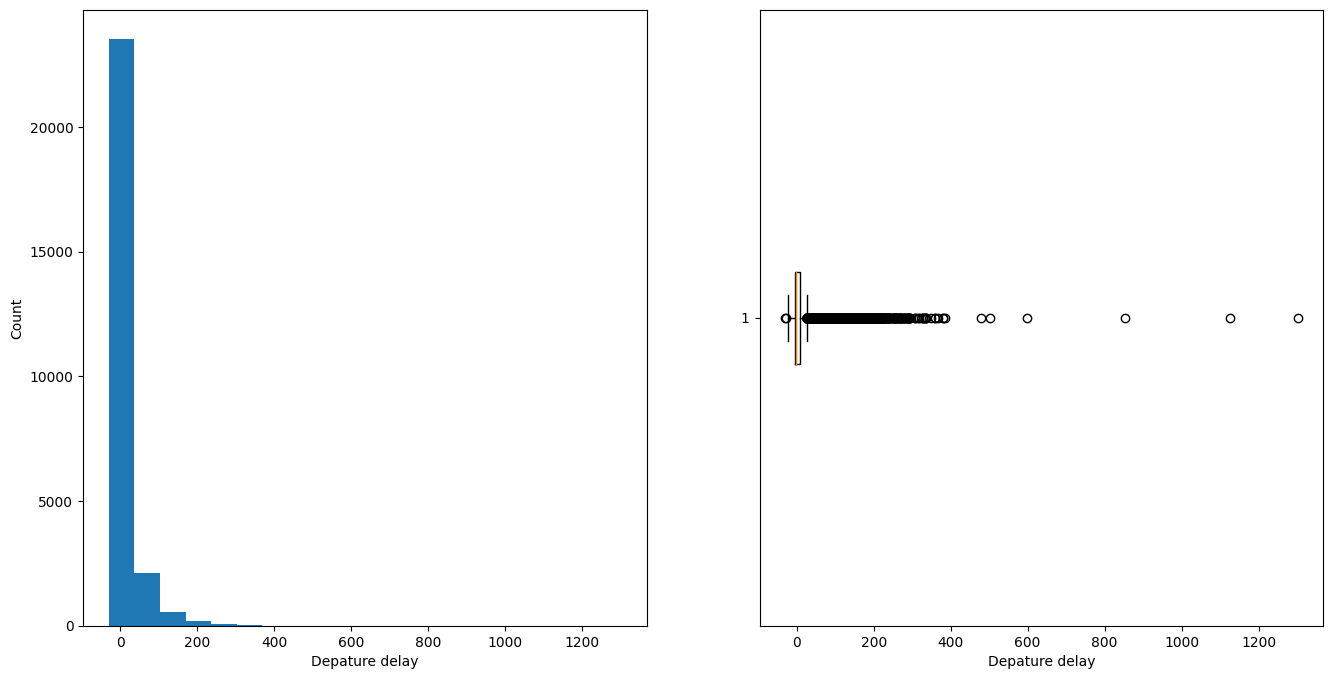

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(16, 8))
 
# Creating plot
ax1.hist(data['dep_delay'], bins=20)
ax1.set_xlabel('Depature delay')
ax1.set_ylabel('Count')

ax2.boxplot(data['dep_delay'], vert=False)
ax2.set_xlabel('Depature delay')
 
# show plot
plt.show()

In [12]:
mean = data['arr_delay'].mean()
std = data['arr_delay'].std()
print(mean-2*std, mean+2*std)

-74.71782305928267 86.97776699442926


In [13]:
len(data)

26398

# Feature Selection

In [14]:
data_filter = data[(data['arr_delay'] <= mean+2*std) & (data['arr_delay'] >= mean-2*std)]

In [15]:
dep_delays = data_filter["dep_delay"]
dep_delays

0         2.0
1         4.0
2         2.0
3        -1.0
4        -6.0
         ... 
26388    74.0
26389    -3.0
26392    12.0
26394    73.0
26396    91.0
Name: dep_delay, Length: 25267, dtype: float64

In [18]:
# generate features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train_val, X_test, y_train_val, y_test = train_test_split(data_filter, dep_delays, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=0)

# index = (X_train['arr_delay'] <= 60) & (X_train['arr_delay'] >= -60)
# X_train = X_train[index]
# y_train = y_train[index]


train_numerical_features = X_train[['sched_dep_time', 
'sched_arr_time', 'flight','origin', 'time_hour', 
       'temp', 'pressure', 'model', 'seats']]
# train_categorical_features = X_train[["carrier", "flight", "tailnum", 'origin', 'type', 'manufacturer', 'model', 'engine']]
# train_categorical_features = X_train[["carrier", "flight", "tailnum", 'engine']]
val_numerical_features = X_val[['sched_dep_time', 
'sched_arr_time', 'flight','origin', 'time_hour', 
       'temp', 'pressure', 'model', 'seats']]
test_numerical_features = X_test[['sched_dep_time', 
'sched_arr_time', 'flight','origin', 'time_hour', 
       'temp', 'pressure', 'model', 'seats']]
# test_categorical_features = X_test[["carrier", "flight", "tailnum", 'engine']]
# OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
# OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_categorical_features))
# OH_cols_test = pd.DataFrame(OH_encoder.transform(test_categorical_features))
# OH_cols_train.index = X_train.index
# OH_cols_test.index = X_test.index
# OH_X_train = pd.concat([train_numerical_features, OH_cols_train], axis=1)
# OH_X_val = pd.concat([test_numerical_features, OH_cols_test], axis=1)

OH_X_train = train_numerical_features
OH_X_val = val_numerical_features
OH_X_test = test_numerical_features

In [19]:
OH_X_train

,sched_dep_time,sched_arr_time,flight,origin,time_hour,temp,pressure,model,seats
16501,1000,1239,1847,2,1.358676e+09,51.98,1006.900000,44,178.000000
11517,1145,1454,1875,2,1.358161e+09,55.04,1018.300000,95,142.000000
14062,920,1125,4582,2,1.358413e+09,41.00,1017.900000,104,137.265143
25073,1129,1419,523,0,1.359544e+09,51.98,1021.133563,72,200.000000
7407,1435,1742,1902,2,1.357740e+09,48.02,1020.800000,65,145.000000
...,...,...,...,...,...,...,...,...,...
1661,2000,2211,2131,2,1.357157e+09,30.92,1020.300000,65,145.000000
13247,1050,1250,4589,2,1.358330e+09,35.06,1015.100000,104,137.265143
24330,1357,1507,4434,0,1.359464e+09,44.96,1018.900000,87,55.000000
381,1329,1453,4254,0,1.357045e+09,39.20,1021.133563,87,55.000000


# Dummy Classifer

In [20]:
# dummy regressor (baseline)
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(OH_X_train, y_train)
res = dummy_regr.predict(OH_X_test)
mean_squared_error(y_test, res)

329.1104986246052

# Model

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings

# run block of code and catch warnings
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")

parameters = {"gbr__n_estimators": [200,500,1000], "gbr__learning_rate": [0.1]}

pipePCA = Pipeline([('gbr', GradientBoostingRegressor())])
regPCA = GridSearchCV(pipePCA, parameters, scoring="neg_mean_squared_error")
regPCA.fit(OH_X_train, y_train)
regPCA.score(OH_X_val, y_val)

-293.66647687522277

In [22]:
regPCA.score(OH_X_train, y_train)

-258.9750935421316

In [23]:
regPCA.best_params_

{'gbr__learning_rate': 0.1, 'gbr__n_estimators': 200}

In [24]:
from sklearn.ensemble import RandomForestRegressor

# run block of code and catch warnings
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")

parameters = {"rfr__n_estimators": [200, 500, 1000], "rfr__max_depth": [2,3,5,10]}

pipePCA = Pipeline([('rfr', RandomForestRegressor())])
regPCA = GridSearchCV(pipePCA, parameters, scoring="neg_mean_squared_error")
regPCA.fit(OH_X_train, y_train)
regPCA.score(OH_X_val, y_val)

-293.9286630981661

In [25]:
regPCA.score(OH_X_train, y_train)

-190.07681562650268

In [26]:
regPCA.best_params_

{'rfr__max_depth': 10, 'rfr__n_estimators': 500}

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# run block of code and catch warnings
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")

parameters = {}

pipePCA = Pipeline([('regr', KNeighborsRegressor())])
regPCA = GridSearchCV(pipePCA, parameters, scoring="neg_mean_squared_error")
regPCA.fit(OH_X_train, y_train)
regPCA.score(OH_X_val, y_val)

-359.49039257070496

In [28]:
regPCA.score(OH_X_train, y_train)

-233.20209400506616

In [29]:
regPCA.best_params_

{}

In [30]:
from sklearn.linear_model import ElasticNet

# run block of code and catch warnings
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")

parameters = {'regr__alpha': [0.5, 1], "regr__l1_ratio": [0, 0.5, 1]}

pipePCA = Pipeline([('regr', ElasticNet())])
regPCA = GridSearchCV(pipePCA, parameters, scoring="neg_mean_squared_error")
regPCA.fit(OH_X_train, y_train)
regPCA.score(OH_X_val, y_val)

d:\softwares\anaconda\envs\si670f22\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+06, tolerance: 3.591e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
d:\softwares\anaconda\envs\si670f22\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e+06, tolerance: 3.684e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implem

-308.3518836399017

In [31]:
regPCA.score(OH_X_train, y_train)

-305.47006023369187

In [32]:
regPCA.best_params_

{'regr__alpha': 0.5, 'regr__l1_ratio': 1}

In [70]:
from sklearn.kernel_ridge import KernelRidge

# run block of code and catch warnings
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")

parameters = {'regr__alpha': [1], "regr__degree": [2,4]}

pipePCA = Pipeline([('regr', KernelRidge())])
regPCA = GridSearchCV(pipePCA, parameters, scoring="neg_mean_squared_error")
regPCA.fit(OH_X_train, y_train)
regPCA.score(OH_X_val, y_val)

d:\softwares\anaconda\envs\si670f22\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\softwares\anaconda\envs\si670f22\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\softwares\anaconda\envs\si670f22\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\softwares\anaconda\envs\si670f22\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\softwares\anaconda\envs\si670f22\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
d:\so

-305.0259564819594

In [71]:
regPCA.score(OH_X_train, y_train)

-303.01559216332646

In [72]:
regPCA.best_params_

{'regr__alpha': 1, 'regr__degree': 2}

In [33]:
# best model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings

# run block of code and catch warnings
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")

bestreg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1)
bestreg.fit(OH_X_train, y_train)
res = bestreg.predict(OH_X_test)
mean_squared_error(y_test, res)

285.0537796391752

# Outlier Analysis

In [17]:
mse = []

for q in np.linspace(0.9, 1.0, num=11):
    threshold = np.quantile(data['dep_delay'], q)
    X_train = data[:15000]

    index = X_train["dep_delay"] < threshold
    X_train = X_train[index]
    y_train = dep_delays[:15000][index]
    X_test = data[15000:20000]
    y_test = dep_delays[15000:20000]


    train_numerical_features = X_train[['year', 'month', 'day', 'distance', 'sched_dep_time', 'precip', 'visib', 'speed', 'engines']]
    # train_categorical_features = X_train[["carrier", "flight", "tailnum", 'origin', 'type', 'manufacturer', 'model', 'engine']]
    train_categorical_features = X_train[["carrier", "flight", "tailnum", 'engine']]
    test_numerical_features = X_test[['year', 'month', 'day', 'distance', 'sched_dep_time', 'precip', 'visib', 'speed', 'engines']]
    test_categorical_features = X_test[["carrier", "flight", "tailnum", 'engine']]
    OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_categorical_features))
    OH_cols_test = pd.DataFrame(OH_encoder.transform(test_categorical_features))
    OH_cols_train.index = X_train.index
    OH_cols_test.index = X_test.index
    OH_X_train = pd.concat([train_numerical_features, OH_cols_train], axis=1)
    OH_X_val = pd.concat([test_numerical_features, OH_cols_test], axis=1)

    parameters = {"pca__n_components": [2],
            "gbc__n_estimators": [200]}

    pipePCA = Pipeline([('pca', PCA()), ('gbc', GradientBoostingRegressor())])
    regPCA = GridSearchCV(pipePCA, parameters, scoring="neg_mean_squared_error")
    regPCA.fit(OH_X_train, y_train)
    mse.append(regPCA.score(OH_X_val, y_test))

print(mse)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).